#### Take a binary image & perform Rigion Filling Algorithm using morphological operation

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

shape of the original image: (512, 512)


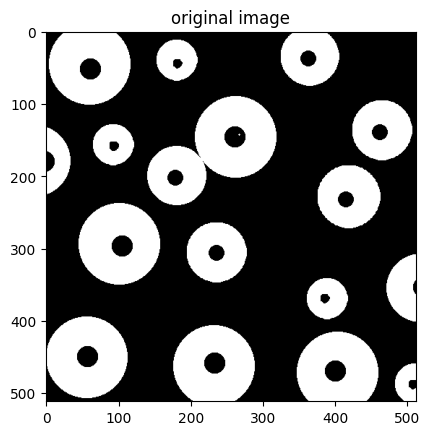

min pixel intensity: 0
max pixel intensity: 255


In [2]:
original_image = cv2.imread('./images/circle.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for Dilation 

In [3]:
def dilation(image, st_element):
    # Create a black output image of the same size
    dilated_image = np.zeros_like(image)
    
    # Scale structuring element to 255 values (foreground)
    st_element = st_element * 255
    
    # Compute half size of structuring element for offset
    offset = st_element.shape[0] // 2
    height, width = image.shape
    
    # Iterate through every pixel in the image
    for row in range(height):
        for col in range(width):
            is_hit = False
            
            # Loop through each value in the structuring element
            for dx in range(-offset, offset + 1):
                for dy in range(-offset, offset + 1):
                    # Corresponding coordinates
                    img_row = row + dx
                    img_col = col + dy
                    st_row = dx + offset
                    st_col = dy + offset
                    
                    # Check for valid coordinates
                    if 0 <= img_row < height and 0 <= img_col < width:
                        # If SE has 255 and image at that position is 255 → it's a hit
                        if st_element[st_row, st_col] == 255 and image[img_row, img_col] == 255:
                            is_hit = True
                            break
                if is_hit:
                    break
            
            # Set output pixel to 255 if any hit is found
            dilated_image[row, col] = 255 if is_hit else 0
    
    return np.uint8(dilated_image)

In [4]:
def region_fill(binary_image, seed_point, struct_elem):
    height, width = binary_image.shape
    filled = np.zeros((height, width), dtype=np.uint8)

    # Step 1: Initialize with seed point
    x, y = seed_point
    filled[x, y] = 255

    # Step 2: Get complement of binary image
    complement = np.where(binary_image == 0, 255, 0)

    # Step 3: Iteratively apply morphological formula
    while True:
        prev = filled.copy()
        filled = dilation(filled, struct_elem)
        filled = np.bitwise_and(filled, complement)
        if np.array_equal(filled, prev):
            break

    # Optional: Merge filled region into original
    result = np.bitwise_or(binary_image, filled)
    return result

### Complement of the image

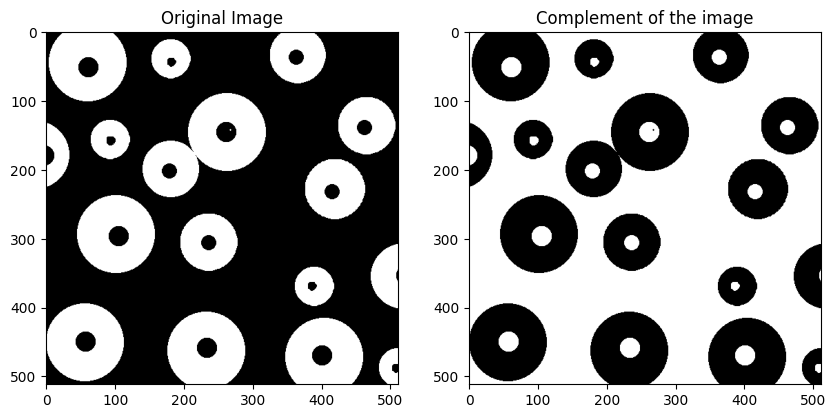

In [19]:
A = original_image.copy()
Ac = 255 - A
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')


plt.subplot(1,2,2)
plt.imshow(Ac, cmap='gray')
plt.title('Complement of the image')
plt.show()

### Region Filling Algorithm

In [67]:
X = original_image.copy()
B = np.ones((3, 3), dtype=np.uint8)
iteration = 0
while True:
    # Perform dilation (X_k = X_{k-1} ⊕ B)
    X_dilated = dilation(X, B)

    # Take the intersection with A^c (X_k = (X_{k-1} ⊕ B) ∩ A^c)
    X_new = X_dilated & Ac

    # If the region doesn't change, stop the iterations
    if np.array_equal(X_new, X):
        break
    
    X = X_new  # Update X for next iteration
    iteration += 1
    if iteration == 10:
        break

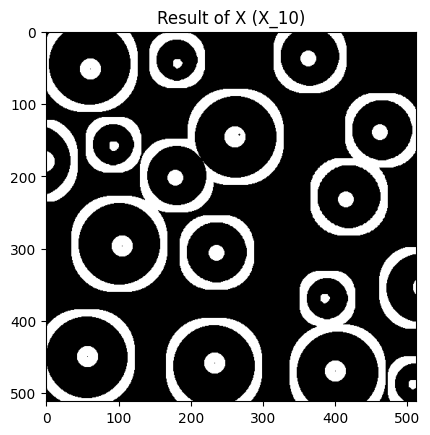

In [68]:
plt.title(f"Result of X (X_{iteration})")
plt.imshow(X, cmap='gray')
plt.show()

### 

### Filled Region 

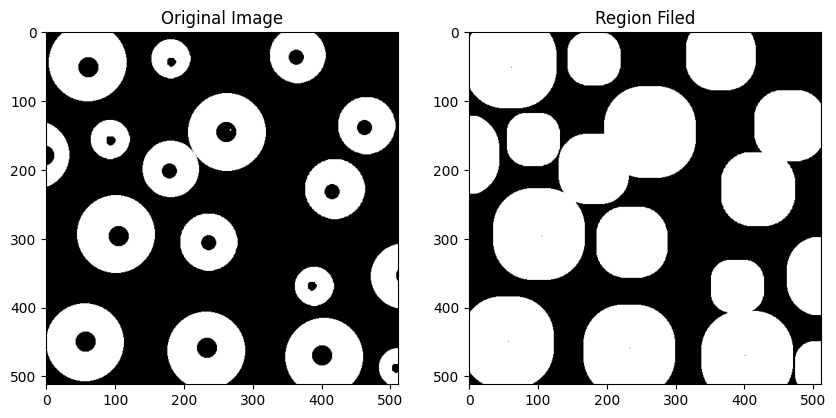

In [74]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
filled_image =  X | original_image
plt.imshow(filled_image, cmap='gray')
plt.title('Region Filed')
plt.show()